In [1]:
from skimage.color import rgb2gray    # rgb to gray scale conversion
import numpy as np
import cv2                            # Read write show image
import matplotlib.pyplot as plt
from scipy import ndimage             # Multi dimensional image processing
from PIL import Image
import copy
from skimage.filters import threshold_multiotsu

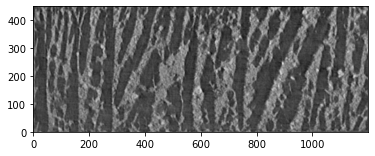

In [2]:
# Actual image 

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = "lower",cmap = "gray")

image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = "lower",cmap = "gray")


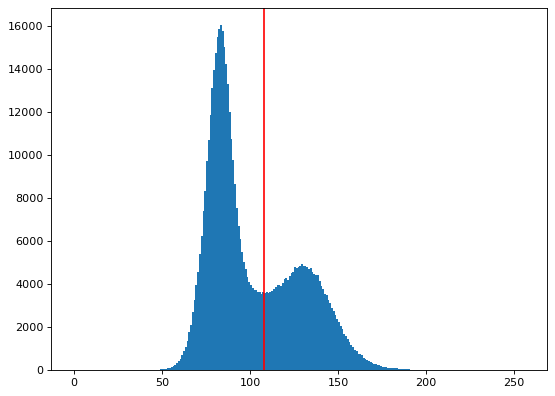

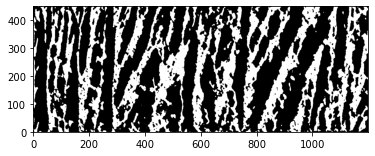

In [4]:
# OTSU

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
histogram = plt.hist(image_3d.ravel(),256,[0,256]); 
ret2,otsu = cv2.threshold(image_3d,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.axvline(ret2,color = 'red')
plt.show()
plt.imshow(otsu,origin = "lower",cmap = 'gray')

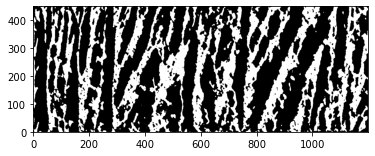

In [6]:
# kmeans with 2 clusters


"""  As we dont have training images we cannot make a call on number of clusters but
    By looking at the histogram we can see that it has two peaks, dividing it into two parts will be ideal.
"""

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = "lower",cmap = "gray")
image_3d = image_3d[300:750,400:1600]
image_3d = image_3d/255
plt.imshow(image_3d,origin = "lower",cmap = "gray")
image_n = image_3d.reshape(image_3d.shape[0] * image_3d.shape[1],1)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0).fit(image_n)
pic_show = kmeans.cluster_centers_[kmeans.labels_]   
kmeans = pic_show.reshape(image_3d.shape[0],image_3d.shape[1])
plt.imshow(kmeans,origin = "lower",cmap = "gray")

In [7]:
# Transform cluster pic 0 - black, 255 - white.

unique_elements = np.unique(kmeans)
print("Unique elements are ",unique_elements)

kmeans_duplicate = kmeans
kmeans_duplicate[kmeans_duplicate == unique_elements[0]] =  0
kmeans_duplicate[kmeans_duplicate == unique_elements[1]] = 255


difference_OTSU_kmeans = np.abs(np.subtract(otsu,kmeans_duplicate)) 
difference_OTSU_kmeans = np.subtract(otsu,kmeans_duplicate) 
np.unique(difference_OTSU_kmeans)

# Result is same as OTSU , the difference between them is zero.


Unique elements are  [0.33095908 0.51870132]


array([0.])

Total unchanged pixel 531420
Black to white 4599
white to black 3981


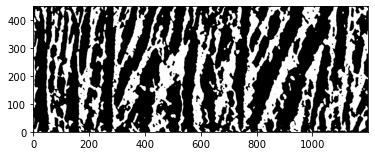

In [8]:
#Median filter 5 x 5

# Remove Noise white,back.
median5x5 = cv2.medianBlur(otsu, 5)
plt.imshow(median5x5,origin = "lower",cmap = 'gray')

difference1 = np.subtract(otsu,median5x5)
u,c = np.unique(difference1,return_counts = True)
print("Total unchanged pixel",c[0])
print("Black to white",c[1])
print("white to black",c[2])


Total unchanged pixel 517702
Black to white 10879
white to black 11419


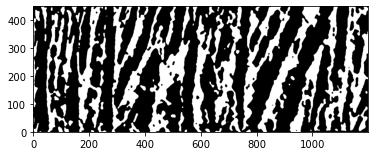

In [9]:
# Median filter - 9 x 9
"""
the median of all the pixels under the kernel area and the central element is replaced with this median value. 

output - removes a good salt pepper nosie.
"""
median9x9 = cv2.medianBlur(otsu, 9)
plt.imshow(median9x9,origin = "lower",cmap = "gray")

difference2 = np.subtract(otsu,median9x9)
u,c = np.unique(difference2,return_counts = True)
print("Total unchanged pixel",c[0])
print("Black to white",c[1])
print("white to black",c[2])

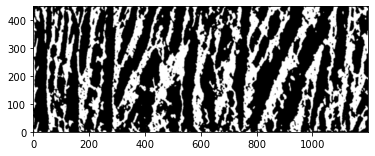

In [10]:
# Gaussian Filter - weighted average
"""
In this method, instead of a box filter, a Gaussian kernel is used. 
We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.  

output - the image gets blurred. Noise not much removed(bigger noise is not affected)
"""

gaussian = cv2.GaussianBlur(otsu,(5,5),0)
plt.imshow(gaussian,origin = "lower",cmap = "gray")


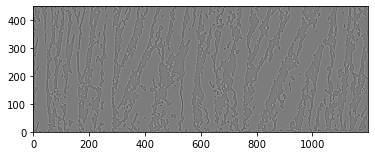

In [11]:
# laplacian      
"""
 It calculates second order derivatives in a single pass. It uses good for edge detection.
 The operator uses two 3X3 kernels which are convolved with the original
 image to calculate approximations of the derivatives 
 
 output - This method is good when there is good contrast(different intensities)
         between the background and the object.
 
"""
ddepth = cv2.CV_16S
kernel_size = 3

laplace = cv2.Laplacian(gaussian, ddepth, ksize=kernel_size)
plt.imshow(laplace,origin = "lower",cmap = "gray")

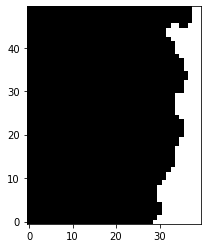

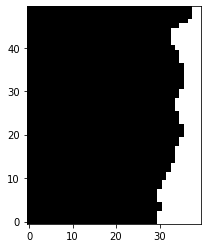

Total unchanged pixel 1980
Black to white 11
white to black 9


In [12]:
# region check

"""
    Region check
    output - it smoothens the image, we are loosing edges too.
"""

region = otsu[200:250,550:590]
plt.imshow(region,origin = "lower",cmap = "gray")
plt.show()

median5x5 = cv2.medianBlur(region, 5)
plt.imshow(median5x5,origin = "lower",cmap = 'gray')
plt.show()

difference = np.subtract(region,median5x5)
u,c = np.unique(difference,return_counts = True)
print("Total unchanged pixel",c[0])
print("Black to white",c[1])
print("white to black",c[2])

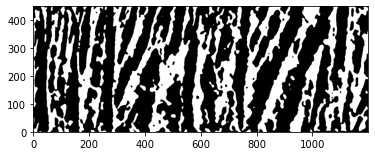

In [17]:
# image --> Noise removal median 9x9 --> OTSU

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = "lower",cmap = "gray")
image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = "lower",cmap = "gray")

median = cv2.medianBlur(image_3d, 9)
plt.imshow(median,origin = "lower",cmap = "gray")

ret2,otsu_new = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu_new,origin = "lower",cmap = 'gray')

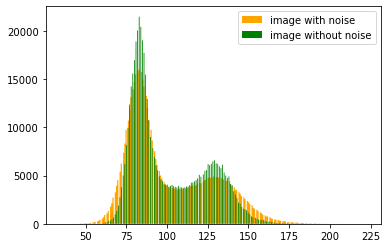

In [15]:
plt.hist(image_3d.ravel(),bins = 256,color = 'orange',histtype = "stepfilled",label = 'image with noise')
plt.hist(median.ravel(),bins = 256,color = 'green',histtype = 'stepfilled',label = 'image without noise')
plt.legend()
plt.show()

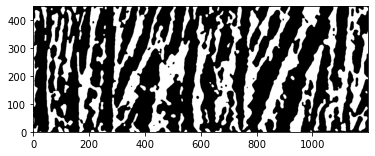

In [21]:
# image --> Noise removal median 11x11 --> OTSU

images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = "lower",cmap = "gray")
image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = "lower",cmap = "gray")


median = cv2.medianBlur(image_3d, 11)
plt.imshow(median,origin = "lower",cmap = "gray")


ret2,otsu_new = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu_new,origin = "lower",cmap = 'gray')

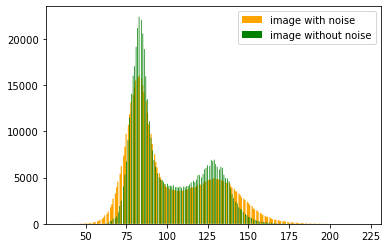

In [20]:
plt.hist(image_3d.ravel(),bins = 256,color = 'orange',histtype = "stepfilled",label = 'image with noise')
plt.hist(median.ravel(),bins = 256,color = 'green',histtype = 'stepfilled',label = 'image without noise')
plt.legend()
plt.show()

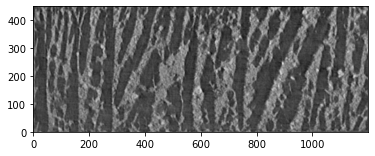

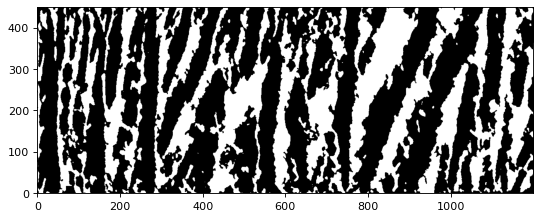

In [27]:
# Flood fill algorithm  binary_fill_holes


images_3d = plt.imread(r'C:\Users\nikhi\Desktop\MSE\Data\Li-ion_battery_porous_electrode-20200420T163505Z-001\XRM\CZ XRM_Clemson_Carbon_HR_0.34um_0014.tiff')
image_3d = copy.deepcopy(images_3d)                      # To get permission for changes with image
image_3d = (image_3d/256).astype('uint8')
plt.imshow(image_3d,origin = "lower",cmap = "gray")

image_3d = image_3d[300:750,400:1600]
plt.imshow(image_3d,origin = "lower",cmap = "gray")

# OTSU
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ret2,otsu = cv2.threshold(image_3d,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,origin = "lower",cmap = 'gray')

# Binary flood fill
img_fill_holes=ndimage.binary_fill_holes(otsu).astype(int)
plt.imshow(img_fill_holes,origin = "lower",cmap = 'gray')